In [2]:
# notebooks/eda.ipynb

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
from torchvision import datasets, transforms
import torch
from torch.utils.data import DataLoader

from collections import Counter
import os
import tarfile
import shutil
import urllib.request
%matplotlib inline

/home/nguyenvd_drone/miniconda3/envs/andt/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 0. Giải nén 
> Tải link sau: https://www.cs.toronto.edu/~kriz/cifar.html

In [5]:
!pwd

/storageStudents/ncsmmlab/tungufm/VitFromScratch/notebooks


In [23]:
# # 0. Giải nén
path = './data'
tar_path = os.path.join(path, 'cifar-100-python.tar.gz')

# if os.path.exists(tar_path):
#     with tarfile.open(tar_path, 'r:gz') as tar:
#         tar.extractall(path=path)
#     print("Giải nén hoàn tất.")
# else:
#     print("Không tìm thấy file cifar-100-python.tar.gz")

In [3]:
def list_directory(path, indent=""):
    print(f"{indent}{os.path.basename(path)}/")
    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            list_directory(item_path, indent + "  ")
        else:
            print(f"{indent} {item}")

list_directory(path)

NameError: name 'path' is not defined

In [4]:
# Định nghĩa các augmentations mạnh hơn cho CIFAR-100
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)), 
    transforms.RandomHorizontalFlip(),
    transforms.RandAugment(num_ops=2, magnitude=9), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4867, 0.4408],
                        std=[0.2675, 0.2565, 0.2761]) # Mean/std của CIFAR-100
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4867, 0.4408],
                        std=[0.2675, 0.2565, 0.2761])
])

# Mean RGB: (0.5071, 0.4866, 0.4409)
# Std RGB: (0.2009, 0.1984, 0.2023)


# (mean=[0.5071, 0.4867, 0.4408],
#                         std=[0.2675, 0.2565, 0.2761])

In [14]:
# Load datasets
train_dataset = datasets.CIFAR100(root=path, train=True, 
                                transform=train_transform, download=True)
test_dataset = datasets.CIFAR100(root=path, train=False,
                                transform=test_transform, download=True)



Files already downloaded and verified
Files already downloaded and verified


In [15]:
# Sử dụng DataLoader với num_workers và pin_memory 
train_loader = DataLoader(train_dataset, batch_size=128,
                         shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=128,
                        shuffle=False, num_workers=4, pin_memory=True)

In [5]:
# 1. Load CIFAR-100 dataset
data_path = '/storageStudents/ncsmmlab/tungufm/VitFromScratch/notebooks/data/cifar-100-python'
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.CIFAR100(root=data_path, train=True, download=False, transform=transform)
test_dataset = datasets.CIFAR100(root=data_path, train=False, download=False, transform=transform)

print(f"Training set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")
print(f"Dataset is ready for use!")

Training set size: 50000
Test set size: 10000
Dataset is ready for use!


In [25]:
# 2. Basic Information
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")
print(f"Image shape: {train_dataset[0][0].shape}")
print(f"Number of classes: {len(train_dataset.classes)}")
print(f"Classes: {train_dataset.classes}")


Number of training samples: 50000
Number of test samples: 10000
Image shape: torch.Size([3, 32, 32])
Number of classes: 100
Classes: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'ta

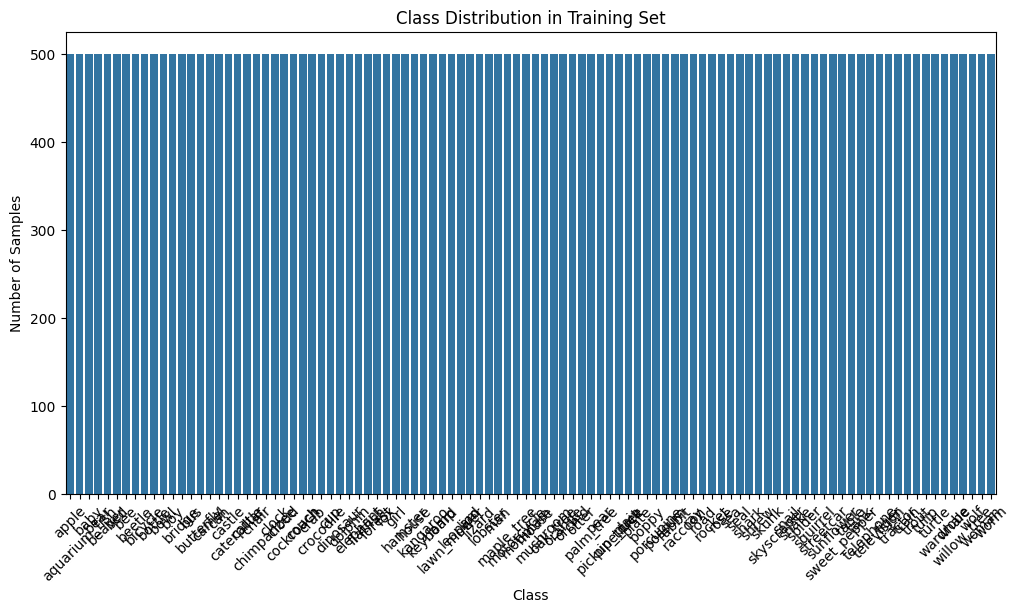

In [18]:
# 3. Class Distribution
train_labels = [label for _, label in train_dataset]
class_distribution = Counter(train_labels)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(range(100), train_dataset.classes, rotation=45)
plt.show()

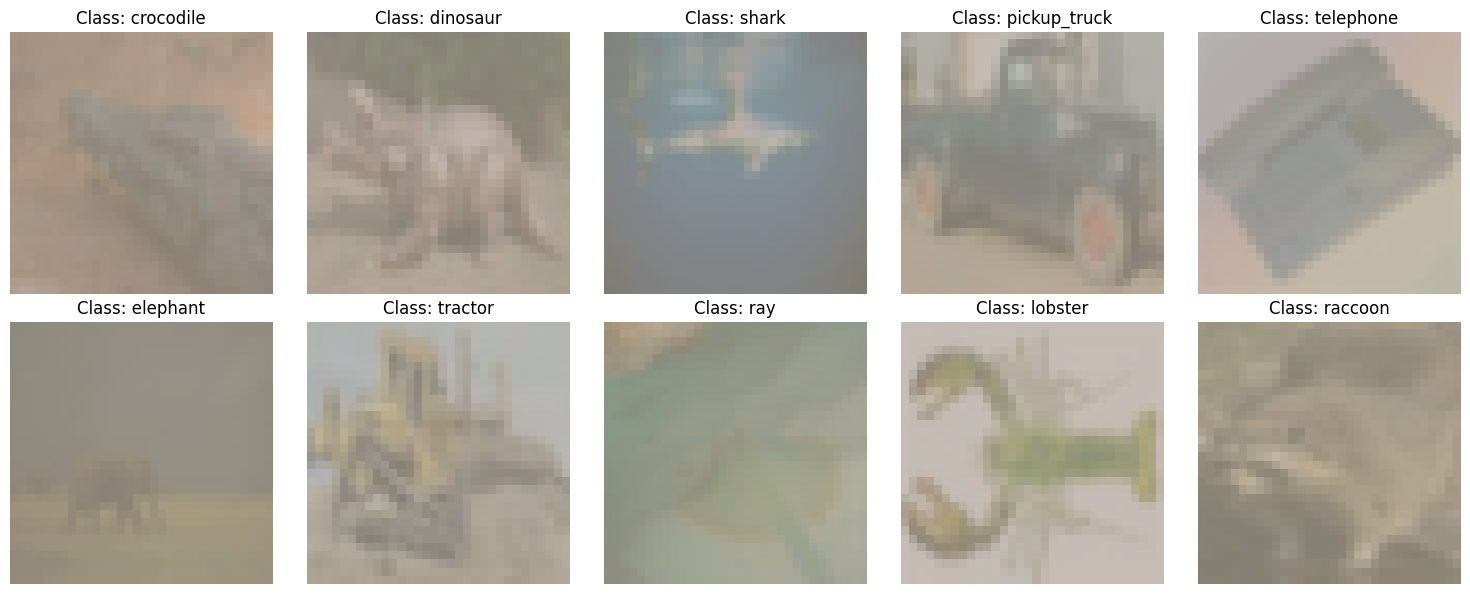

In [30]:
def show_random_images(dataset, num_images=10):
    # Tạo figure với kích thước phù hợp
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()
    
    # Lấy random indices
    indices = np.random.choice(len(dataset), num_images, replace=False)
    
    for idx, sample_idx in enumerate(indices):
        img, label = dataset[sample_idx]
        img = img.permute(1, 2, 0) # CHW -> HWC
        
        # De-normalize
        mean = torch.tensor([0.5071, 0.4867, 0.4408]).view(1, 1, 3)
        std = torch.tensor([0.2675, 0.2565, 0.2761]).view(1, 1, 3)
        img = img * std + mean
        
        # Clip values to [0,1]
        img = torch.clamp(img, 0, 1)
        
        axes[idx].imshow(img)
        axes[idx].set_title(f'Class: {dataset.classes[label]}')
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Hiển thị 10 ảnh ngẫu nhiên
show_random_images(train_dataset)

IndexError: index 10 is out of bounds for axis 0 with size 10

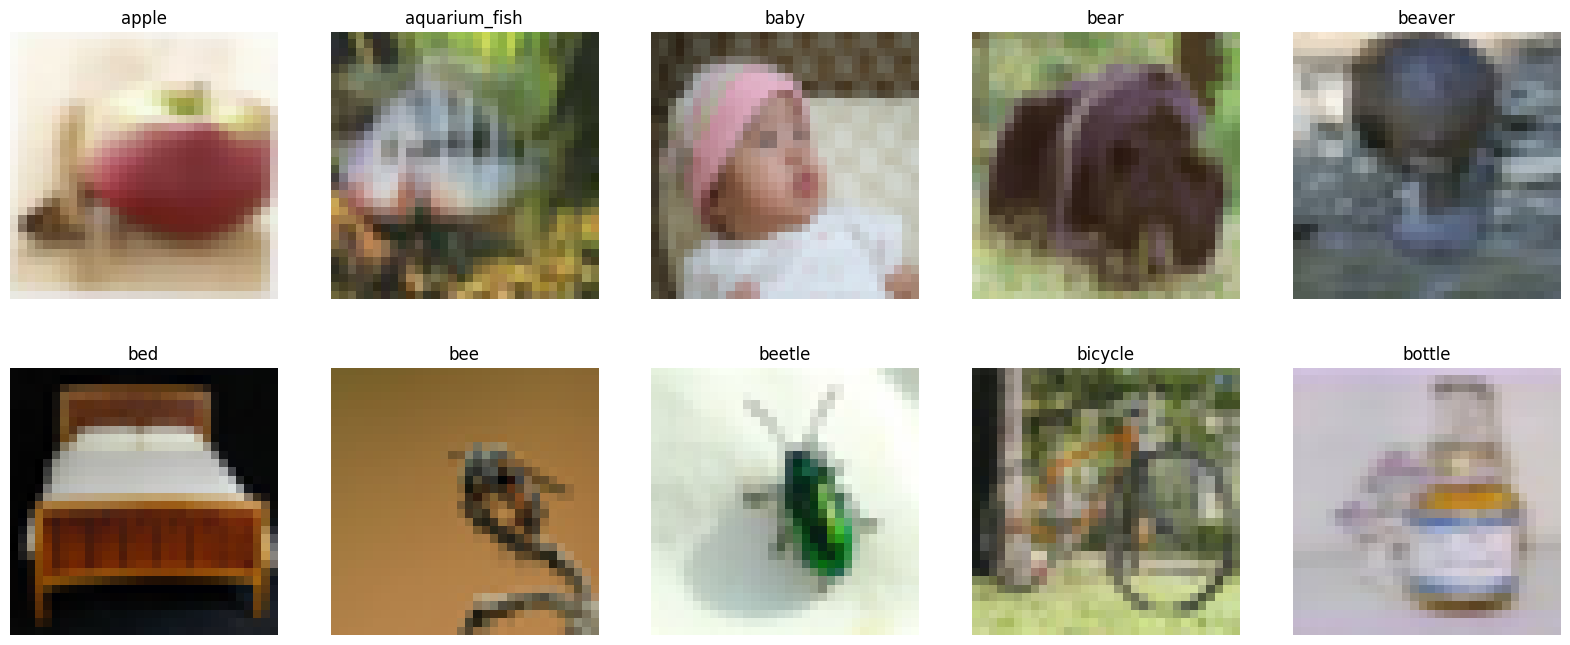

In [10]:
# 4. Display Sample Images
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i, class_name in enumerate(train_dataset.classes):
    idx = train_labels.index(i)
    img, label = train_dataset[idx]
    axes[i].imshow(img.permute(1, 2, 0))
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()



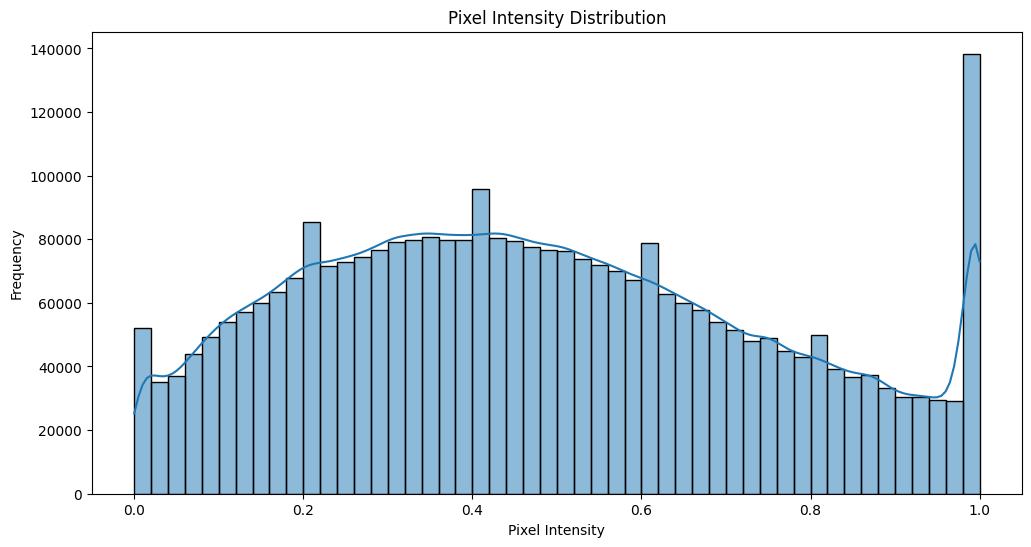

In [11]:
# 5. Pixel Intensity Distribution
random_indices = np.random.choice(len(train_dataset), 1000, replace=False)
pixel_intensities = []

for idx in random_indices:
    img, _ = train_dataset[idx]
    pixel_intensities.extend(img.numpy().flatten())

plt.figure(figsize=(12, 6))
sns.histplot(pixel_intensities, bins=50, kde=True)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()



In [6]:
# 6. Image Statistics
mean_r, mean_g, mean_b = 0, 0, 0
std_r, std_g, std_b = 0, 0, 0

for img, _ in train_dataset:
    mean_r += img[0].mean()
    mean_g += img[1].mean()
    mean_b += img[2].mean()
    std_r += img[0].std()
    std_g += img[1].std()
    std_b += img[2].std()

mean_r /= len(train_dataset)
mean_g /= len(train_dataset)
mean_b /= len(train_dataset)
std_r /= len(train_dataset)
std_g /= len(train_dataset)
std_b /= len(train_dataset)

print(f"Mean RGB: ({mean_r:.4f}, {mean_g:.4f}, {mean_b:.4f})")
print(f"Std RGB: ({std_r:.4f}, {std_g:.4f}, {std_b:.4f})")



Mean RGB: (0.5071, 0.4866, 0.4409)
Std RGB: (0.2009, 0.1984, 0.2023)


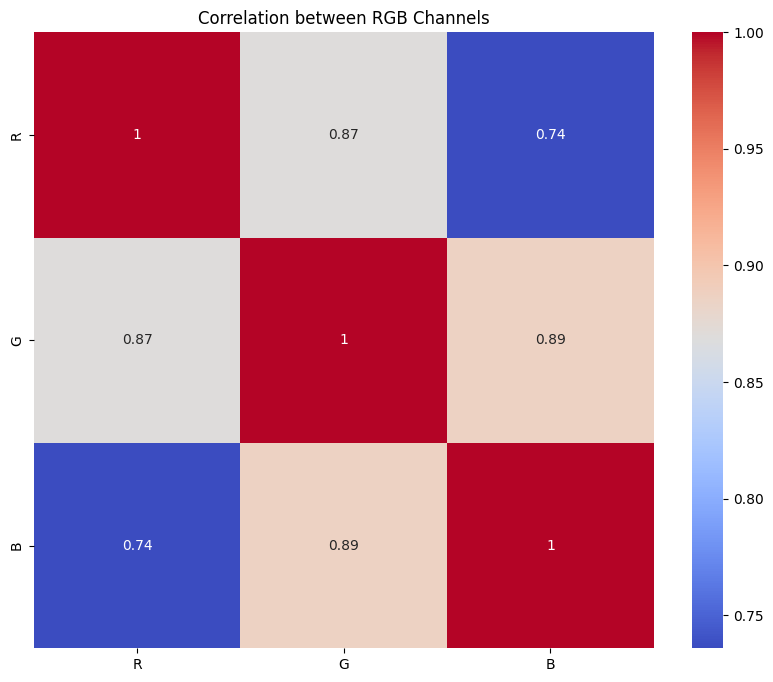

In [21]:
# 7. Correlation between RGB Channels
random_indices = np.random.choice(len(train_dataset), 1000, replace=False)
r_vals, g_vals, b_vals = [], [], []

for idx in random_indices:
    img, _ = train_dataset[idx]
    r_vals.extend(img[0].numpy().flatten())
    g_vals.extend(img[1].numpy().flatten())
    b_vals.extend(img[2].numpy().flatten())

corr_matrix = np.corrcoef([r_vals, g_vals, b_vals])

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=['R', 'G', 'B'], yticklabels=['R', 'G', 'B'])
plt.title("Correlation between RGB Channels")
plt.show()



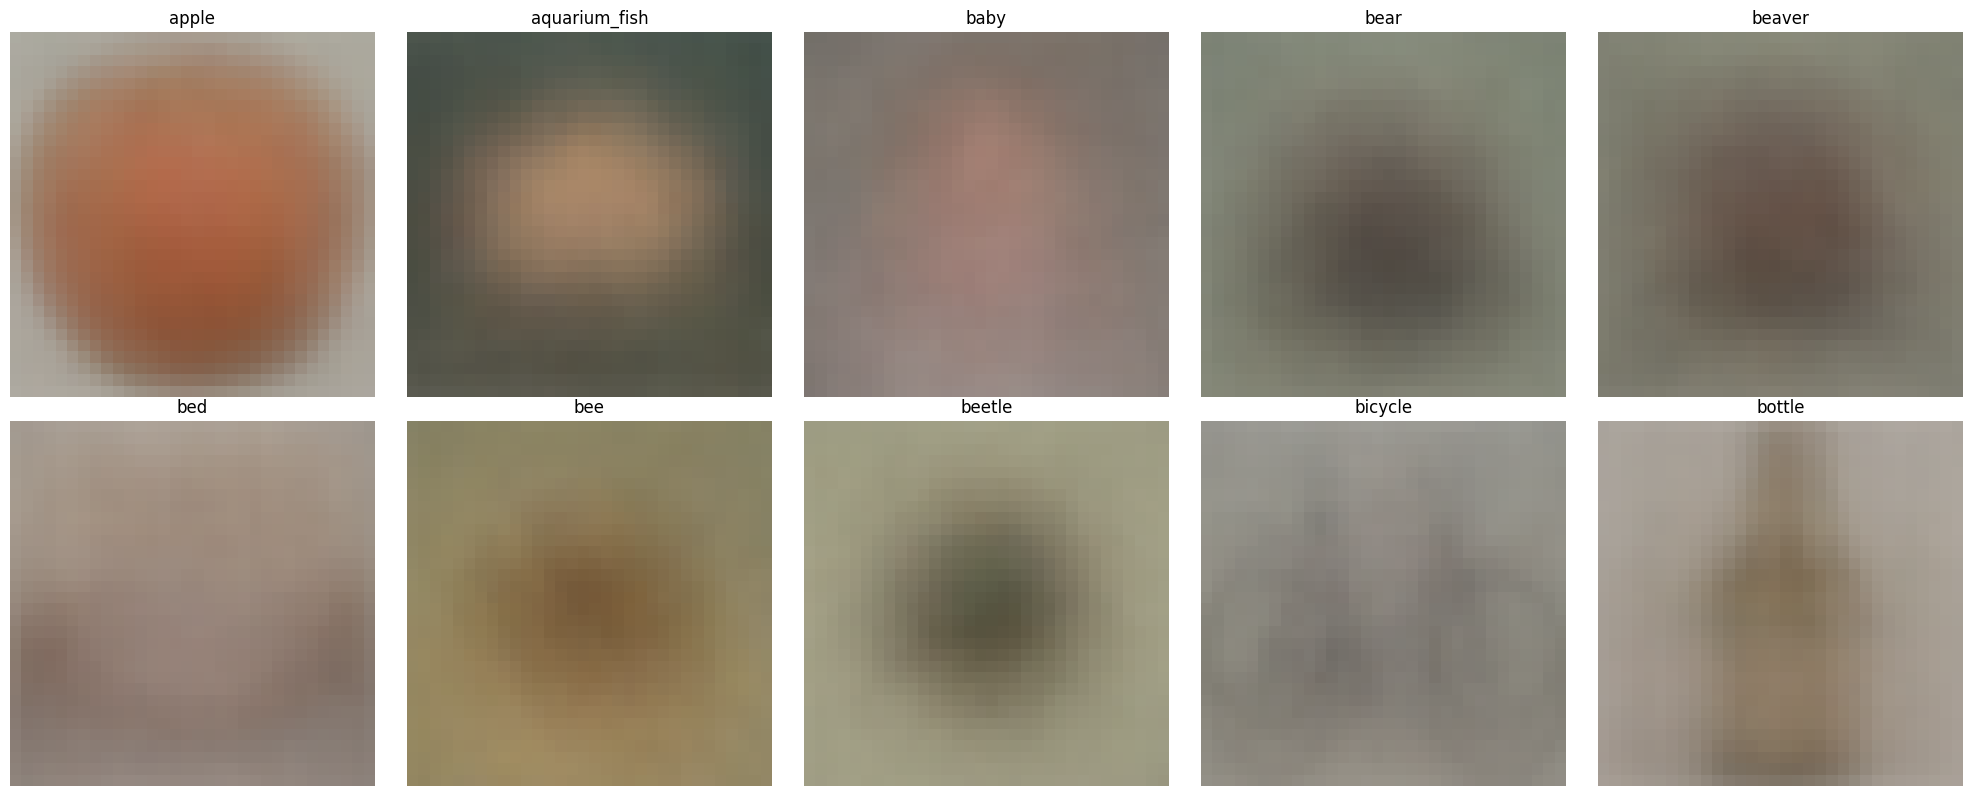

In [14]:
# 8. Class Separability Analysis
def compute_class_mean(dataset, class_idx):
    class_images = [img for img, label in dataset if label == class_idx]
    return torch.stack(class_images).mean(dim=0)

class_means = [compute_class_mean(train_dataset, i) for i in range(10)]

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i, mean_img in enumerate(class_means):
    axes[i].imshow(mean_img.permute(1, 2, 0))
    axes[i].set_title(train_dataset.classes[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()



In [22]:
# 9. Inter-class Similarity
similarity_matrix = torch.zeros((100, 100))

for i in range(10):
    for j in range(10):
        similarity_matrix[i, j] = torch.nn.functional.cosine_similarity(
            class_means[i].view(-1), class_means[j].view(-1), dim=0
        )

plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.title("Inter-class Similarity (Cosine Similarity)")
plt.show()



NameError: name 'class_means' is not defined

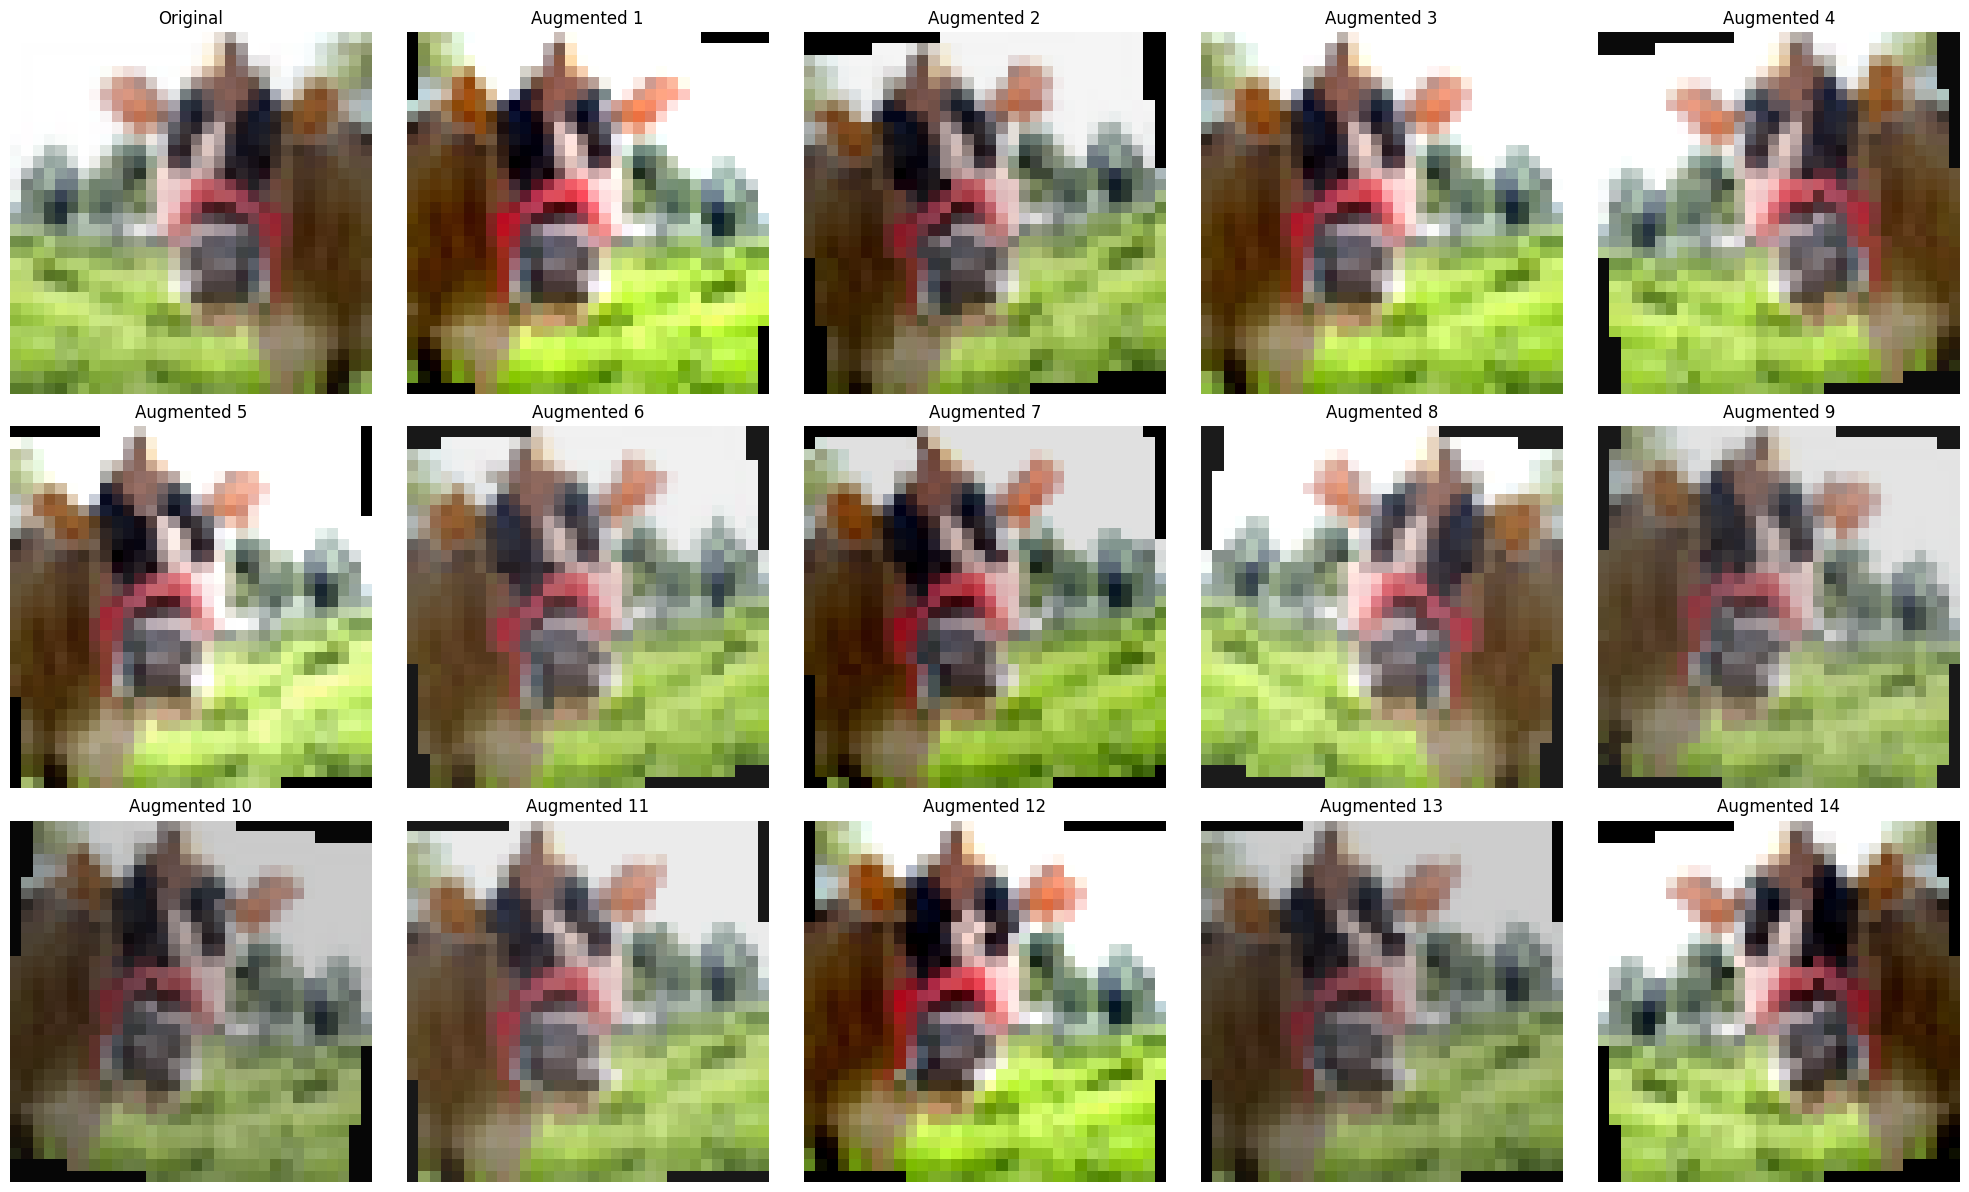

In [16]:
# 10. Data Augmentation Visualization
augmentation_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor()
])

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.ravel()

sample_img, _ = train_dataset[0]
axes[0].imshow(sample_img.permute(1, 2, 0))
axes[0].set_title("Original")
axes[0].axis('off')

for i in range(1, 15):
    augmented_img = augmentation_transform(transforms.ToPILImage()(sample_img))
    axes[i].imshow(augmented_img.permute(1, 2, 0))
    axes[i].set_title(f"Augmented {i}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()